# Time Series

In [1]:
# Daily births dataset -- Stationary

In [2]:
import os

os.chdir('C:\\Users\\aksom\\Desktop\\ML Projects\\Time Series')


In [37]:
#Importing All Lib

import pandas as pd
import numpy as np
from pandas import Series
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)

import warnings


In [6]:
data = pd.read_csv('daily_Female_Births_Dataset.csv')
data.head()

,Date,Births
0,1/1/1959,35
1,1/2/1959,32
2,1/3/1959,30
3,1/4/1959,31
4,1/5/1959,44


In [8]:
data['Date']=pd.to_datetime(data['Date'])
data.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [10]:
X= data.set_index('Date').values
X

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [11]:
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.153846
variance1=49.213410, variance2=48.789518


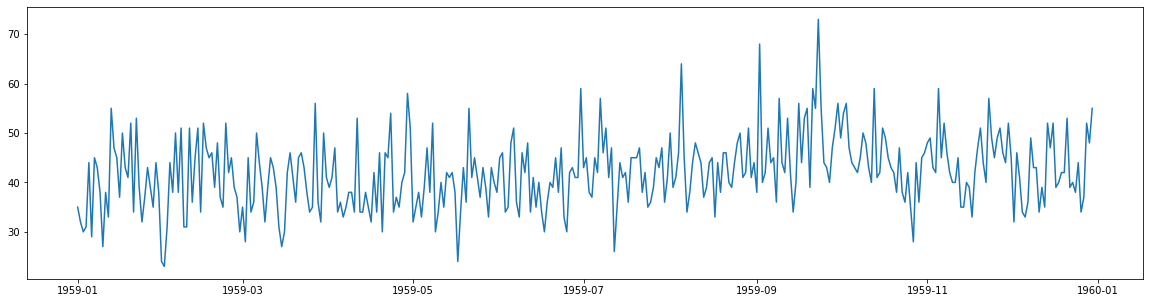

In [14]:
plt.figure(figsize=(20,5))
plt.plot(data['Date'],data['Births'])

In [15]:
# Airline Passengers dataset -- Non-Stationary


In [18]:
passengers_data = pd.read_csv('Airline_Passengers_Dataset.csv', header=0)
passengers_data

,Month,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121
...,...,...
139,8/1/1960,606
140,9/1/1960,508
141,10/1/1960,461
142,11/1/1960,390


In [21]:
passengers_data['Month']=pd.to_datetime(passengers_data['Month'])
passengers_data.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [22]:
X= passengers_data.set_index('Month').values
X

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [23]:
split = int(len(X) / 2)

X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


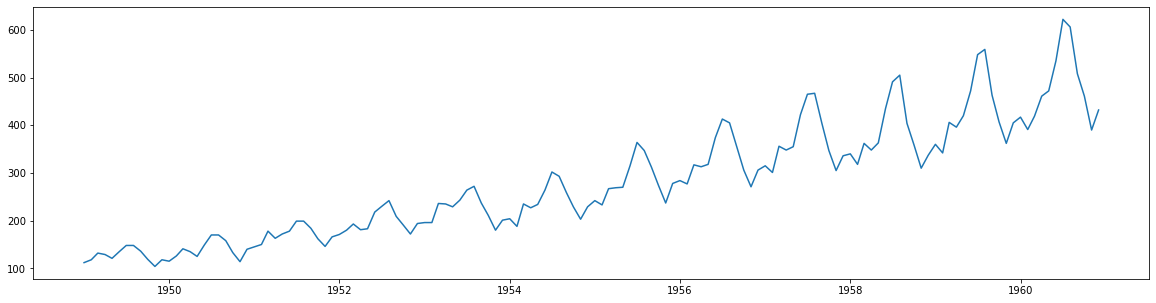

In [24]:
plt.figure(figsize=(20,5))

plt.plot(passengers_data['Month'],passengers_data['Passengers'])


In [25]:
import numpy.ma as ma

from statsmodels.tsa.stattools import acf,pacf

In [26]:
X= passengers_data.set_index('Month')
ma.corrcoef(ma.masked_invalid(X['Passengers'].shift(1)),X['Passengers'])

masked_array(
  data=[[1.0, 0.9601946480498527],
        [0.9601946480498527, 1.0]],
  mask=[[False, False],
        [False, False]],
  fill_value=1e+20)

In [28]:
# Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(passengers_data['Passengers'])

test_result

print("p_value of test is %f" % test_result[1])


p_value of test is 0.991880


In [29]:
# Making a time series stationary


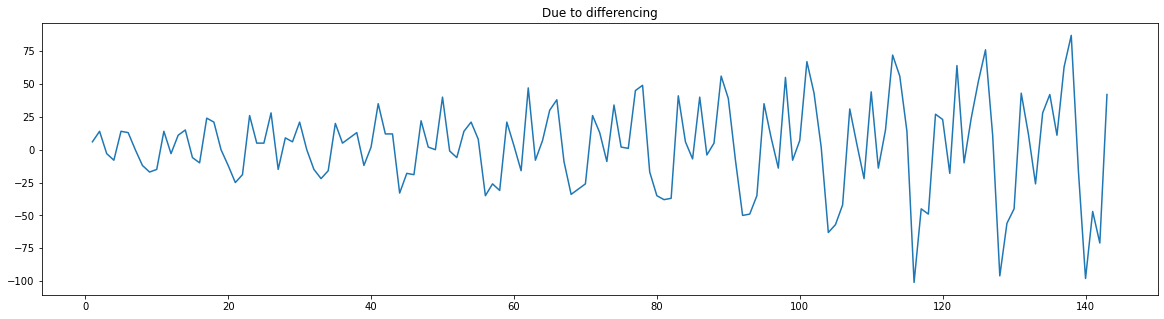

In [30]:
#1. Differencing

passengers_data['#Passengers_dif'] = passengers_data['Passengers'] - passengers_data['Passengers'].shift(1)
plt.figure(figsize=(20,5))
passengers_data['#Passengers_dif'].dropna().plot()
plt.title('Due to differencing')
plt.show()


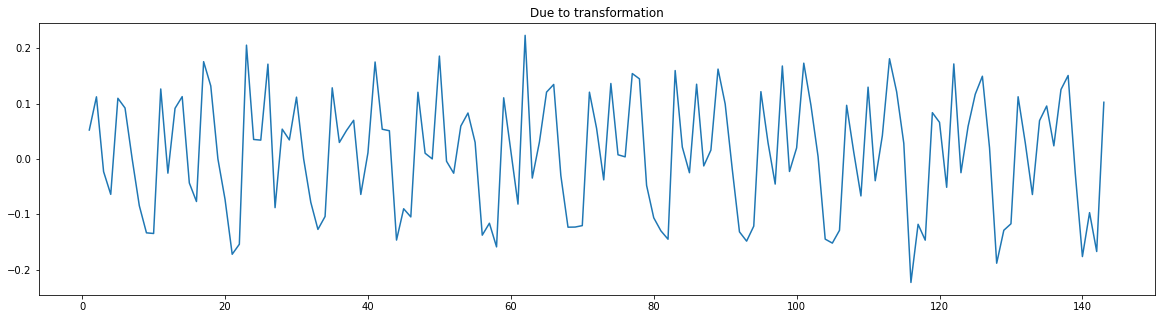

In [31]:
#2. Transformations

passengers_data['#Passengers_log'] = np.log(passengers_data['Passengers'])
passengers_data['#Passengers_log_dif'] = passengers_data['#Passengers_log'] - passengers_data['#Passengers_log'].shift(1)
passengers_data['#Passengers_log_dif'].dropna().plot()
plt.title("Due to transformation")
plt.show()


            Passengers  #Passengers_dif  #Passengers_log  #Passengers_log_dif
Month                                                                        
1949-01-01         112              NaN         4.718499                  NaN
1949-02-01         118              6.0         4.770685             0.052186
1949-03-01         132             14.0         4.882802             0.112117
1949-04-01         129             -3.0         4.859812            -0.022990
1949-05-01         121             -8.0         4.795791            -0.064022
...                ...              ...              ...                  ...
1960-08-01         606            -16.0         6.406880            -0.026060
1960-09-01         508            -98.0         6.230481            -0.176399
1960-10-01         461            -47.0         6.133398            -0.097083
1960-11-01         390            -71.0         5.966147            -0.167251
1960-12-01         432             42.0         6.068426        

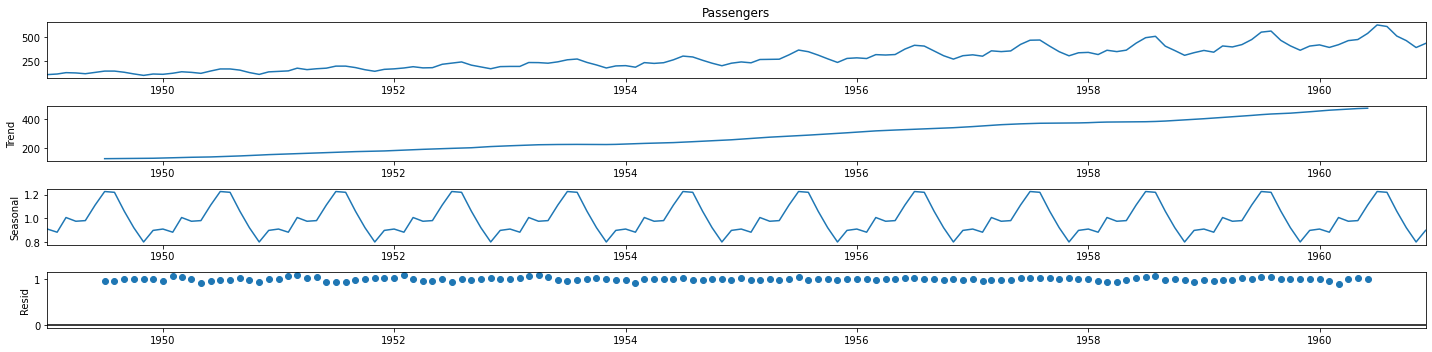

In [33]:
#Decomposing a time series

from statsmodels.tsa.seasonal import seasonal_decompose

X1= passengers_data.set_index('Month')

print(X1)

decompose_result=seasonal_decompose(X1['Passengers'],model='multplicative')

decompose_result.plot()

plt.show()

In [41]:
# ARIMA Model

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(passengers_data['#Passengers_log_dif'], nlags=20)

lag_acf

#lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols'))

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])